<a href="https://colab.research.google.com/github/yamaarashi-owo/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

簡易QRコード

QRコードを読み込むことも作ることもできる。
５×５マスで、角３マスを向きを確認するために用いたので２２文字のデータを入れることができる。

In [69]:
import numpy as np
import cv2, sys
from google.colab.patches import cv2_imshow
import glob

In [87]:
#450＊450の黒の画像を作る
img_black = np.zeros((500,500,3), np.uint8)
#cv2_imshow(img_black)
cv2.imwrite('black.jpg',img_black)

True

In [108]:
#文字データを作る
data_ch = np.array(['0','1','2','3','4','5','6','7','8','9',
                    'A','B','C','D','E','F','G','H','I','J',
                    'K','L','M','N','O','P','Q','R','S','T',
                    'U','V','W','X','Y','Z'])
#色データを作る
data_co = np.array([250000250,250000200,250000150,250000100,250000050,250250000,250200000,250150000,250100000,250050000,
                    200000250,200000200,200000150,200000100,200000050,200250000,200200000,200150000,200100000,200050000,
                    150000250,150000200,150000150,150000100,150000050,150250000,150200000,150150000,150100000,150050000,
                    100000250,100000200,100000150,100000100,100000050,100250000,100200000,100150000,100100000,100050000])

In [130]:
moji = input('数字と大文字アルファベット22個：')
if len(moji) == 22 :
  print('入力された文字でQRコードを作成します。')
else :
  print('22文字で入力してください。')

data_n = np.array([])
data_n1 = np.array([])

#入力から文字データ
for i in range(22) :
  a = moji[i]
  x = np.where(data_ch == a)[0][0]
  data_n = np.append(data_n,str(x))
#print(data_n)

#文字データから色データ
for j in range(22) :
  b = int(data_n[j])
  x = data_co[b]
  data_n1 = np.append(data_n1,str(x))
#print(data_n1)

数字と大文字アルファベット22個：20240116HIROSHIMACITYU
入力された文字でQRコードを作成します。


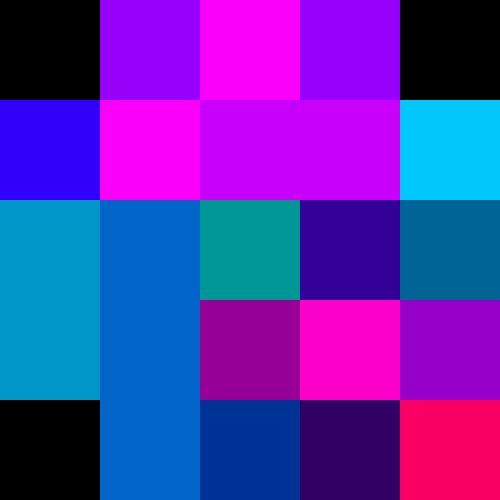

True

In [131]:
#色データから画像
img_b = cv2.imread('black.jpg')


for i in range(22) :
  B = int(data_n1[i][:3])
  G = int(data_n1[i][3:6])
  R = int(data_n1[i][6:])

  img = np.full((100,100,3),(B,G,R))

  if i <= 2 :
    img_b[0:100,100*(i+1):100*(i+2)] = img
  elif i <= 7 :
    img_b[100:200,100*(i-3):100*(i-2)] = img
  elif i <= 12 :
    img_b[200:300,100*(i-8):100*(i-7)] = img
  elif i <= 17 :
    img_b[300:400,100*(i-13):100*(i-12)] = img
  else :
    img_b[400:500,100*(i-17):100*(i-16)] = img


cv2_imshow(img_b)
cv2.imwrite('QR.png',img_b)

In [132]:
#画像の角度調整


#画像から色データ
img_qr = cv2.imread('QR.png')
data_cr = np.array([])
for iy in range(5) :
  for ix in range(5) :
    Br = f'{(img_qr[50+iy*100,50+ix*100][0]):03}'
    Gr = f'{(img_qr[50+iy*100,50+ix*100][1]):03}'
    Rr = f'{(img_qr[50+iy*100,50+ix*100][2]):03}'
    x = Br + Gr + Rr
    #print(Br,Gr,Rr)
    if x != '000000000' :
      data_cr = np.append(data_cr,x)

#print(data_cr)

In [133]:
#色データから文字データ
data_o = np.array([])

for i in range(22) :
  a = int(data_cr[i])
  x = np.where(data_co == a)[0][0]
  y = data_ch[x]
  data_o = np.append(data_o,str(y))
#print(data_o)

data_l = ''.join(data_o)
print(data_l)

20240116HIROSHIMACITYU
